In [49]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_processing import read_image
from hough_transform import fast_hough_transform, find_max_value
from draw_line import draw_line, hough_transform

In [50]:
from PIL import Image, ImageDraw

# Создаем новое изображение размером 100x100
image = Image.new("RGB", (100, 100), "black")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем горизонтальную линию на середине изображения
draw.line((0, 50, 99, 50), fill="white")

# # Конвертируем изображение в оттенки серого
grayscale_image = image.convert('L')

# Сохраняем изображение
image.save("images/horizontal_line.png")

In [110]:
pic_name = 'rgb1.png'

after final_img (40, 40)
after fast_hough
after find_max
after draw 29 0


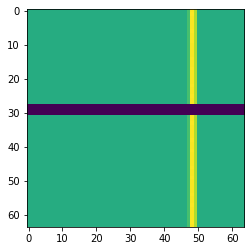

In [111]:
FOLDER = 'images/'
img_new = read_image(FOLDER, pic_name)
# print('after read_iamge', img_new.shape)

max_hft, obr, line_img= hough_transform(img_new, draw=1)
# print('after hough_transform')
# print(line_img[64])
# print(img_new[76])

In [112]:
def transform_pixels(array):
    transformed_array = np.where(array != 0, 64, array)
    return transformed_array

In [125]:
from scipy.stats import mode
def transform_rgb_pixels(array):
    array_1d = array.flatten()
    unique_values, counts = np.unique(array_1d, return_counts=True)
    most_common_index = np.argmax(counts)
    most_common_value = unique_values[most_common_index]
    transformed_array = np.where(array != most_common_value, 64, array)
    print(most_common_value)
    return transformed_array

In [136]:
print(line_img[:,49])

[219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219
 219 219 219 219 219 219 219 219 219 219  64  64  64 219 219 219 219 219
 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219 219
 219 219 219 219 219 219 219 219 219 219]


In [138]:
print(img_new[29])

[250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250 250
 250 250 250 250 250 250 250 250 250 250 250 251 254 253 250 250 250 250
 250 250 250 250 250 250 250 250 250 250]


In [134]:
print(transform_rgb_pixels(img_new)[29])

173
[64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64]


In [129]:
def compare_transform(image1, image2, threshold=0.7):
    # Сравнение изображений с помощью корреляции
    correlation = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)[0][0]

    # Проверка, превышает ли корреляция пороговое значение
    return correlation >= threshold

In [130]:
def compare_rgb_images_with_lines(image1, image2, threshold=0.7):
    image1 = transform_rgb_pixels(image1)
    # Сравнение изображений с помощью корреляции
    correlation = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)[0][0]

    # Проверка, превышает ли корреляция пороговое значение
    return correlation >= threshold

plt.imshow(line_img)

In [131]:
def compare_images_with_lines(image1, image2, threshold=0.9):
    image1 = transform_pixels(image1)
    # Сравнение изображений с помощью корреляции
    correlation = cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)[0][0]

    # Проверка, превышает ли корреляция пороговое значение
    return correlation >= threshold

In [132]:
compare_rgb_images_with_lines(img_new, line_img)

173


False

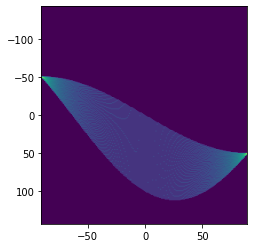

In [18]:
from skimage.transform import hough_line
from matplotlib import cm


image = Image.open('images/horizontal_line.png')
grayscale_image = np.asarray(image.convert('L'))

h, theta, d = hough_line(grayscale_image)
angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
hough = np.log(1 + h)
plt.imshow(hough, extent=bounds, aspect=1 / 1.5)

In [28]:
print(obr)

[[  0.   0.   0. ... 224. 198.  83.]
 [  0.   0.   0. ... 254. 224. 339.]
 [  0.   0.   0. ... 366. 198.  83.]
 ...
 [  0.   0.   0. ... 198. 224. 339.]
 [  0.   0.   0. ... 224. 198.  83.]
 [  0.   0.   0. ... 198. 224. 339.]]


In [26]:
print(hough)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [48]:
compare_transform(obr, hough)

error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/templmatch.cpp:1164: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'


In [21]:

# Создаем новое изображение размером 100x100 с черным фоном
image = Image.new("RGB", (100, 100), "black")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем вертикальные белые линии посередине изображения
draw.line((25, 0, 25, 99), fill="white")
draw.line((75, 0, 75, 99), fill="white")

# Рисуем горизонтальные белые линии посередине изображения
draw.line((0, 25, 99, 25), fill="white")
draw.line((0, 75, 99, 75), fill="white")

# # Конвертируем изображение в оттенки серого
grayscale_image = image.convert('L')

# Сохраняем изображение в папку images
image.save("images/lines.png")


In [24]:

# Создаем новое изображение размером 10x500
image = Image.new("RGB", (10, 500), "white")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем горизонтальную линию на середине изображения
draw.line((0, 250, 9, 250), fill="black")

# Сохраняем изображение
image.save("images/horizontal_line_10x500.png")


In [25]:


# Создаем новое изображение размером 3x3
image = Image.new("RGB", (3, 3), "white")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем горизонтальную линию на середине изображения
draw.line((0, 1, 2, 1), fill="black")

# Сохраняем изображение
image.save("images/horizontal_line_3x3.png")


In [26]:

# Создаем новое изображение размером 3x3
image = Image.new("RGB", (3, 3), "white")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем вертикальную линию на середине изображения
draw.line((1, 0, 1, 2), fill="black")

# Сохраняем изображение
image.save("images/vertical_line_3x3.png")


In [27]:

# Создаем новое изображение размером 500x10
image = Image.new("RGB", (500, 10), "white")

# Создаем объект ImageDraw для рисования на изображении
draw = ImageDraw.Draw(image)

# Рисуем вертикальную линию на середине изображения
draw.line((249, 0, 249, 9), fill="black")

# Сохраняем изображение
image.save("images/vertical_line_500x10.png")

